# Machine learning intro

## sources
https://github.com/machinelearningmindset/machine-learning-course
https://medium.com/explore-artificial-intelligence/an-introduction-to-recurrent-neural-networks-72c97bf0912
https://www.analyticsvidhya.com/blog/2019/04/introduction-deep-q-learning-python/
https://keon.io/deep-q-learning/
https://learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
https://tiewkh.github.io/blog/deepqlearning-openaitaxi/
https://www.alexirpan.com/2018/02/14/rl-hard.html
https://towardsdatascience.com/real-world-examples-of-applied-machine-learning-from-ai-conference-4d4678700c6

All machine learning is AI, but not all AI is machine learning.

**Supervised learning** : Machine learning, deep learning
**Unsupervised learning** : reinforcement learning

**Deep learning** is a subset of machine learning (deep artificial neural networks)

**Classification** is about predicting a label and **regression** is about predicting a quantity.

**Training set** to train our model and a **testing set** to test its accuracy


## Linear regression
is a technique used to analyze a linear relationship between input variables and a single output variable. A linear relationship means that the data points tend to follow a straight line. 
Simple linear regression involves only a single input variable. (we could have more than one input variable, multiple linear regression)

=> Cost Function, error and squared error, Mean Squared Error (MSE)
=> minimizing the cost function : Ordinary Least Squares, Gradient descent


![title](img/image.png)

## Overfitting / Underfitting 

Regularization : pattern vs noise 
cost func = CF + λ * R
Ridge regression/ Lasso regression


![title](img/image2.png)

## Cross-validation
assures a model is producing accurate results and comparing those results against other models

Holdout Method
K-Fold Cross Validation
Leave-P-Out Cross Validation


![title](img/image3.png)

## Dev

Python

SciKit Learn : general machine learning library, built on top of NumPy

TensorFlow : library for array data calculations and computations that can be used to conduct neural network and deep learning

Keras : high-level framework on top of TensorFlow

PyTorch


You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


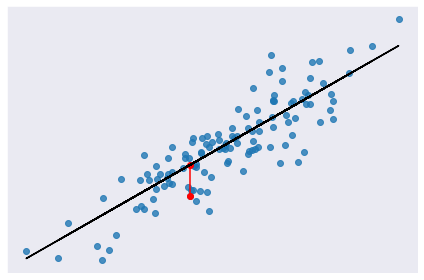

In [16]:
!py -m pip install seaborn
!py -m pip install sklearn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Create a data set for analysis
x, y = make_regression(n_samples=500, n_features = 1, noise=25, random_state=0)

# Split the data set into testing and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Create a linear regression object
#regression = linear_model.LinearRegression()
regression = linear_model.SGDRegressor(max_iter=10000, tol=0.001)

# Train the model using the training set
regression.fit(x_train, y_train)

# Make predictions using the testing set
y_predictions = regression.predict(x_test)

# Grab a sample pair of points to analyze cost
point_number = 2
x_sample = [x_test[point_number].item(), x_test[point_number].item()]
y_sample = [y_test[point_number].item(), y_predictions[point_number].item()]
plt.plot(x_sample, y_sample, color='red', label="cost", marker='o')

# Plot the data
sns.set_style("darkgrid")
sns.regplot(x_test, y_test, fit_reg=False)
plt.plot(x_test, y_predictions, color='black')

# Remove ticks from the plot
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

## Supervised learning


### Decision Trees
Decision trees are a classifier in machine learning that allows us to make predictions based on previous data. They are like a series of sequential “if … then” statements you feed new data into to get a result.

A Classification Tree, is used to get a result from a set of possible values. A Regression Tree is a decision tree where the result is a continuous value, such as the price of a car.

![title](img/image4.png)
![title](img/image5.png)

Cost of Splitting : cost function, Gini Information Gain
Pruning :  it's beneficial to prune less important splits of a decision tree away. Pruning involves calculating the information gain of each ending sub-tree (the leaf nodes and their parent node), then removing the sub-tree with the least information gain


In [19]:
!py -m pip install graphviz
import graphviz
import itertools
import random 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder

# The possible values for each class 
classes = {
    'supplies': ['low', 'med', 'high'],
    'weather':  ['raining', 'cloudy', 'sunny'],
    'worked?':  ['yes', 'no']
}

# Our example data from the documentation
data = [
    ['low',  'sunny',   'yes'],
    ['high', 'sunny',   'yes'],
    ['med',  'cloudy',  'yes'],
    ['low',  'raining', 'yes'],
    ['low',  'cloudy',  'no' ],
    ['high', 'sunny',   'no' ],
    ['high', 'raining', 'no' ],
    ['med',  'cloudy',  'yes'],
    ['low',  'raining', 'yes'],
    ['low',  'raining', 'no' ],
    ['med',  'sunny',   'no' ],
    ['high', 'sunny',   'yes']
]

# Our target variable, whether someone went shopping
target = ['yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no']

# Scikit learn can't handle categorical data, so form numeric representations of the above data
# Categorical data support may be added in the future: https://github.com/scikit-learn/scikit-learn/pull/4899
categories = [classes['supplies'], classes['weather'], classes['worked?']]
encoder = OneHotEncoder(categories=categories)

x_data = encoder.fit_transform(data)

# Form and fit our decision tree to the now-encoded data
classifier = DecisionTreeClassifier()
tree = classifier.fit(x_data, target)

# Now that we have our decision tree, let's predict some outcomes from random data
# This goes through each class and builds a random set of 5 data points
prediction_data = []
for _ in itertools.repeat(None, 5):
    prediction_data.append([
        random.choice(classes['supplies']),
        random.choice(classes['weather']),
        random.choice(classes['worked?'])
    ])

# Use our tree to predict the outcome of the random values
prediction_results = tree.predict(encoder.transform(prediction_data))



# =============================================================================
# Output code

def format_array(arr):
    return "".join(["| {:<10}".format(item) for item in arr])

def print_table(data, results):
    line = "day  " + format_array(list(classes.keys()) + ["went shopping?"])
    print("-" * len(line))
    print(line)
    print("-" * len(line))

    for day, row in enumerate(data):
        print("{:<5}".format(day + 1) + format_array(row + [results[day]]))
    print("")

feature_names = (
    ['supplies-' + x for x in classes["supplies"]] +
    ['weather-' + x for x in classes["weather"]] +
    ['worked-' + x for x in classes["worked?"]]
)

# Shows a visualization of the decision tree using graphviz
# Note that sklearn is unable to generate non-binary trees, so these are based on individual options in each class
#dot_data = export_graphviz(tree, filled=True, proportion=True, feature_names=feature_names) 
#graph = graphviz.Source(dot_data)
#graph.render(filename='decision_tree', cleanup=True, view=True)

# Display out training and prediction data and results
print("Training Data:")
print_table(data, target)

print("Predicted Random Results:")
print_table(prediction_data, prediction_results)

Training Data:
---------------------------------------------------------
day  | supplies  | weather   | worked?   | went shopping?
---------------------------------------------------------
1    | low       | sunny     | yes       | yes       
2    | high      | sunny     | yes       | no        
3    | med       | cloudy    | yes       | no        
4    | low       | raining   | yes       | no        
5    | low       | cloudy    | no        | yes       
6    | high      | sunny     | no        | no        
7    | high      | raining   | no        | no        
8    | med       | cloudy    | yes       | no        
9    | low       | raining   | yes       | no        
10   | low       | raining   | no        | yes       
11   | med       | sunny     | no        | yes       
12   | high      | sunny     | yes       | no        

Predicted Random Results:
---------------------------------------------------------
day  | supplies  | weather   | worked?   | went shopping?
--------------------

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### k-Nearest Neighbors

A classifier takes an already labeled data set, and then it trys to label new data points into one of the catagories.
To do this we look at the closest points (neighbors) to the object and the class with the majority of neighbors will be the class that we identify the object to be in.

Brute Force Method : Euclidean distance

K-D Tree Method : The idea behind this method is that if we know that two data points are close to each other and we calculate the Euclidean distance to one of them and then we know that distance is roughly close to the other point. How a K-D tree works is that a node in the tree represents and holds data from an n-dimensional graph. => calculate the Euclidean distance between only the points it is close to until we reach k neighbors.


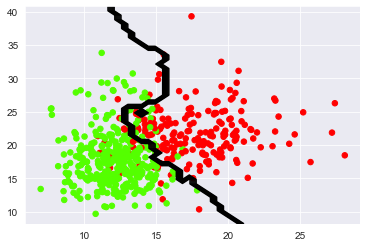

In [22]:
# All the libraries we need for KNN
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
# This is used for our dataset
from sklearn.datasets import load_breast_cancer


# =============================================================================
# We are using sklearn datasets to create the set of data points about breast cancer
# Data is the set data points
# target is the classification of those data points. 
# More information can be found at:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
# =============================================================================
dataCancer = load_breast_cancer()

# The data[:, x:n] gets two features for the data given. 
# The : part gets all the rows in the matrix. And 0:2 gets the first 2 columns 
# If you want to get a different two features you can replace 0:2 with 1:3, 2:4,... 28:30, 
# there are 30 features in the set so it can only go up to 30.
# If we wanted to plot a 3 dimensional plot then the difference between x and n needs to be 3 instead of two
data = dataCancer.data[:, 0:2]
target = dataCancer.target


# =============================================================================
# This creates the KNN classifier and specifies the algorithm being used and the k
# nearest neighbors used for the algorithm. more information can about KNeighborsClassifier
# can be found at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#
# Then it trains the model using the breast cancer dataset. 
# =============================================================================
model = KNeighborsClassifier(n_neighbors = 9, algorithm = 'auto')
model.fit(data, target)


# plots the points 
plt.scatter(data[:, 0], data[:, 1], c=target, s=30, cmap=plt.cm.prism)

# Creates the axis bounds for the grid
axis = plt.gca()
x_limit = axis.get_xlim()
y_limit = axis.get_ylim()

# Creates a grid to evaluate model
x = np.linspace(x_limit[0], x_limit[1])
y = np.linspace(y_limit[0], y_limit[1])
X, Y = np.meshgrid(x, y)
xy = np.c_[X.ravel(), Y.ravel()]

# Creates the line that will separate the data
boundary = model.predict(xy)
boundary = boundary.reshape(X.shape)


# Plot the decision boundary
axis.contour(X, Y,  boundary, colors = 'k')

# Shows the graph
plt.show()


### Naive Bayes Classification


Naive Bayes is a classification technique that uses probabilities we already know to determine how to classify input. These probabilities are related to existing classes and what features they have. 

Bayes’ Theorem => conditional probabilities (the probability of an event happening given another event has happened)

naive => The main thing we will assume is that features are independent. Assuming independence means that the probability of a set of features occurring given a certain class is the same as the product of all the probabilities of each individual feature occurring given that class.           


Gaussian Model (Continuous) : Gaussian models assume features follow a normal distribution

In [24]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

# The features in X are broken down as follows:
# [Red %, Green %, Blue %]

# Some data is created to train with
X = np.array([[.5, 0, .5], [1, 1, 0], [0, 0, 0]])
# These are our target values (Classes: Purple, Yellow, or Black)
y = np.array(['Purple', 'Yellow', 'Black'])

# This is the code we need for the Gaussian model
clf = GaussianNB()
# We train the model on our data
clf.fit(X, y)

# Now we can make a prediction on what class new data belongs to
print("Our data set represents RGB triples and their associated colors.\n")
print("We have trained a Gaussian model on our data set.\n")
print("Let's consider a new input with 100% red, 0% green, and 100% blue.\n")
print("What color does our model think this should be?")
print("Answer: %s!" % clf.predict([[1, 0, 1]])[0])

Our data set represents RGB triples and their associated colors.

We have trained a Gaussian model on our data set.

Let's consider a new input with 100% red, 0% green, and 100% blue.

What color does our model think this should be?
Answer: Purple!


Multinomial Model (Discrete) : Multinomial models are used when we are working with discrete counts. Specifically, we want to use them when we are counting how often a feature occurs.


In [25]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB

# The features in X are broken down as follows:
# [Size, Weight, Color]
#
# Size: 0 = Small, 1 = Moderate, 2 = Large
# Weight: 0 = Light, 1 = Moderate, 2 = Heavy
# Color: 0 = Red, 1 = Blue, 2 = Brown

# Some data is created to train with
X = np.array([[1, 1, 0], [0, 0, 1], [2, 2, 2]])
# These are our target values (Classes: Apple, Blueberry, or Coconut)
y = np.array(['Apple', 'Blueberry', 'Coconut'])

# This is the code we need for the Multinomial model
clf = MultinomialNB()
# We train the model on our data
clf.fit(X, y)

# Now we can make a prediction on what class new data belongs to
print("Our data set represents fruits and their characteristics.\n")
print("We have trained a Multinomial model on our data set.\n")
print("Let's consider a new input that is moderately sized, heavy, and red.\n")
print("What fruit does our model think this should be?")
print("Answer: %s!" % clf.predict([[1, 2, 0]])[0])

Our data set represents fruits and their characteristics.

We have trained a Multinomial model on our data set.

Let's consider a new input that is moderately sized, heavy, and red.

What fruit does our model think this should be?
Answer: Apple!


In [27]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB

# The features in X are broken down as follows:
# [Walks like a duck, Talks like a duck, Is small]
#
# Walks like a duck: 0 = False, 1 = True
# Talks like a duck: 0 = False, 1 = True
# Is small: 0 = False, 1 = True

# Some data is created to train with
X = np.array([[1, 1, 0], [0, 0, 1], [1, 0, 0]])
# These are our target values (Classes: Duck or Not a duck)
y = np.array(['Duck', 'Not a Duck', 'Not a Duck'])

# This is the code we need for the Bernoulli model
clf = BernoulliNB()
# We train the model on our data
clf.fit(X, y)

# Now we can make a prediction on what class new data belongs to
print("Our data set represents things that are and aren't ducks.\n")
print("We have trained a Bernoulli model on our data set.\n")
print(("Let's consider a new input that:\n"
       "   Walks like a duck\n"
       "   Talks like a duck\n"
       "   Is large\n"))
print("What does our model think this should be?")
print("Answer: %s!" % clf.predict([[1, 1, 1]])[0])

Our data set represents things that are and aren't ducks.

We have trained a Bernoulli model on our data set.

Let's consider a new input that:
   Walks like a duck
   Talks like a duck
   Is large

What does our model think this should be?
Answer: Duck!


### Logistic Regression

Logistic regression is a method for binary classification. It works to divide points in a dataset into two distinct classes, or categories. For simplicity, let's call them class A and class B. The model will give us the probability that a given point belongs in category B. If it is low (lower than 50%), then we classify it in category A. Otherwise, it falls in class B. Logistic regression will instead create a sort of S-curve (using the sigmoid function) which will also help show certainty, since the output from logistic regression is not just a one or zero. 

Logistic regression works using a linear combination of inputs, so multiple information sources can govern the output of the model. The parameters of the model are the weights of the various features, and represent their relative importance to the result. Logistic regression is, at its base, a transformation from a linear predictor to a probability between 0 and 1.

Multinomial Logistic Regression : where the output can be any digit from 0 to 9

![img](img/image6.png)

In [28]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import random

#defines the classification for the training data.
def true_classifier(i):
    if i >= 700:
        return 1
    return 0

#Generate a random dataset which includes random scores from 0 to 1000.
x = np.array([ random.randint(0,1000) for i in range(0,1000) ])

#The model will expect a 2D array, so we must reshape
#For the model, the 2D array must have rows equal to the number of samples,
#and columns equal to the number of features.
#For this example, we have 1000 samples and 1 feature.
x = x.reshape((-1, 1))

#For each point, y is a pass/fail for the grade. The simple threshold is arbitrary,
#and can be changed as you would like. Classes are 1 for success and 0 for failure
y = [ true_classifier(x[i][0]) for i in range(0,1000) ]


#Again, we need a numpy array, so we convert.
y = np.array(y)

#Our goal will be to train a logistic regression model to do pass/fail to the same threshold.
model = LogisticRegression(solver='liblinear')

#The fit method actually fits the model to our training data
model = model.fit(x,y)

#Create 100 random samples to try against our model as test data
samples = [random.randint(0,1000) for i in range(0,100)]
#Once again, we need a 2d Numpy array
samples = np.array(samples)
samples = samples.reshape(-1, 1)

#Now we use our model against the samples.  output is the probability, and _class is the class.
_class = model.predict(samples)
proba = model.predict_proba(samples)

num_accurate = 0

#Finally, output the results, formatted for nicer viewing.
#The format is [<sample value>]: Class <class number>, probability [ <probability for class 0> <probability for class 1>]
#So, the probability array is the probability of failure, followed by the probability of passing.
#In an example run, [7]: Class 0, probability [  9.99966694e-01   3.33062825e-05]
#Means that for value 7, the class is 0 (failure) and the probability of failure is 99.9%
for i in range(0,100):
    if (true_classifier(samples[i])) == (_class[i] == 1):
        num_accurate = num_accurate + 1
    print("" + str(samples[i]) + ": Class " + str(_class[i]) + ", probability " + str(proba[i]))
#skip a line to separate overall result from sample output
print("")
print(str(num_accurate) +" out of 100 correct.")

[899]: Class 1, probability [0.04191179 0.95808821]
[855]: Class 1, probability [0.07778047 0.92221953]
[895]: Class 1, probability [0.04437485 0.95562515]
[986]: Class 1, probability [0.01180435 0.98819565]
[379]: Class 0, probability [0.99033016 0.00966984]
[781]: Class 1, probability [0.20281168 0.79718832]
[42]: Class 0, probability [9.99936032e-01 6.39678858e-05]
[881]: Class 1, probability [0.05412507 0.94587493]
[108]: Class 0, probability [9.99828772e-01 1.71227617e-04]
[283]: Class 0, probability [0.99767416 0.00232584]
[108]: Class 0, probability [9.99828772e-01 1.71227617e-04]
[389]: Class 0, probability [0.98879167 0.01120833]
[209]: Class 0, probability [9.99227747e-01 7.72253021e-04]
[504]: Class 0, probability [0.94070064 0.05929936]
[5]: Class 0, probability [9.99963168e-01 3.68320499e-05]
[809]: Class 1, probability [0.1434934 0.8565066]
[324]: Class 0, probability [0.99572048 0.00427952]
[670]: Class 0, probability [0.57133665 0.42866335]
[452]: Class 0, probability [

### Linear Support Vector Machines

The point of SVM's are to try and find a line or hyperplane to divide a dimensional space which best classifies the data points. If we were trying to divide two classes A and B, we would try to best separate the two classes with a line. On one side of the line/hyperplane would be data from class A and on the other side would be from class B.

The algorithm chooses the line/hyperplane with the maximum margin. Maximizing the margin will give us the optimal line to classify the data. 
The data that is closest to the line is what determines the optimal line. These data points are called support vectors. The distance from these vectors to the hyperplane is called the margin.

![img](img/image7.png)

non-linearly separable data = kernel trick. Basically, the kernel trick takes the points to a higher dimension to turn non-linearly separable data to linear separable data.

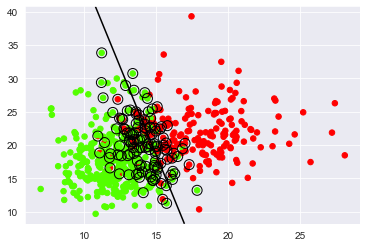

In [29]:
# All the libraries we need for linear SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
# This is used for our dataset
from sklearn.datasets import load_breast_cancer


# =============================================================================
# We are using sklearn datasets to create the set of data points about breast cancer
# Data is the set data points
# target is the classification of those data points. 
# More information can be found athttps://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
# =============================================================================
dataCancer = load_breast_cancer()

# The data[:, x:n] gets two features for the data given. 
# The : part gets all the rows in the matrix. And 0:2 gets the first 2 columns 
# If you want to get a different two features you can replace 0:2 with 1:3, 2:4,... 28:30, 
# there are 30 features in the set so it can only go up to 30.
# If we wanted to plot a 3 dimensional plot then the difference between x and n needs to be 3 instead of two
data = dataCancer.data[:, 0:2]
target = dataCancer.target

# =============================================================================
# Creates the linear svm model and fits it to our data points
# The optional parameter will be default other than these two,
# You can find the other parameters at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# =============================================================================
model = svm.SVC(kernel = 'linear', C = 10000)
model.fit(data, target)


# plots the points 
plt.scatter(data[:, 0], data[:, 1], c=target, s=30, cmap=plt.cm.prism)

# Creates the axis bounds for the grid
axis = plt.gca()
x_limit = axis.get_xlim()
y_limit = axis.get_ylim()

# Creates a grid to evaluate model
x = np.linspace(x_limit[0], x_limit[1], 50)
y = np.linspace(y_limit[0], y_limit[1], 50)
X, Y = np.meshgrid(x, y)
xy = np.c_[X.ravel(), Y.ravel()]

# Creates the decision line for the data points, use model.predict if you are classifying more than two 
decision_line = model.decision_function(xy).reshape(Y.shape)


# Plot the decision line and the margins
axis.contour(X, Y,  decision_line, colors = 'k',  levels=[0], 
           linestyles=['-'])
# Shows the support vectors that determine the desision line
axis.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# Shows the graph
plt.show()



## Unsupervised learning

### Clustering

Clustering is the process of grouping similar data and isolating dissimilar data. Clustering is used to identify potential groups in a data set while classification is used to match an input to an existing group.

K-Means : K-Means clustering attempts to divide a data set into K clusters using an iterative process. The first step is choosing a center point for each cluster.The second step is assigning each data point to a cluster. We do this by measuring the distance between a data point and each center point and choosing the cluster whose center point is the closest. Now that all the data points belong to a cluster, the third step is recomputing the center point of each cluster. This is just the average of all the data points belonging to the cluster. Now we just repeat the second and third step until the centers stop changing or only change slightly between iterations. K-Means clustering requires us to input the number of expected clusters which isn’t always easy to determine. It can also be inconsistent depending on where we choose the starting center points in the first step







[[4. 1.]
 [7. 4.]
 [1. 4.]]


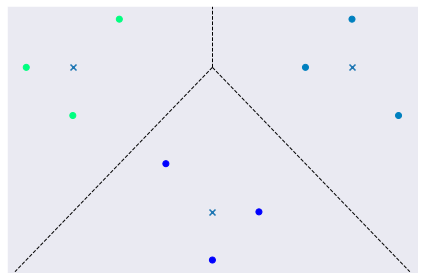

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

# This data set represents a toy manufacturer's product data
#
# The first value in the pair represents a toy:
#    0-2: Action Figures
#    3-5: Building Blocks
#    6-8: Cars
#
# The second value is the age group that buys the most of that toy:
#    0: 5 year-olds
#    1: 6 year-olds
#    2: 7 year-olds
#    3: 8 year-olds
#    4: 9 year-olds
#    5: 10 year-olds
x = np.array([[0,4], [1,3], [2,5], [3,2], [4,0], [5,1], [6,4], [7,5], [8,3]])

# Set up K-Means clustering with a fixed start and stop at 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)

# Plot the data
sns.set_style("darkgrid")
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap=plt.get_cmap("winter"))

# Save the axes limits of the current figure
x_axis = plt.gca().get_xlim()
y_axis = plt.gca().get_ylim()

# Draw cluster boundaries and centers
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], marker='x')
vor = Voronoi(centers)
voronoi_plot_2d(vor, ax=plt.gca(), show_points=False, show_vertices=False)

# Resize figure as needed
plt.gca().set_xlim(x_axis)
plt.gca().set_ylim(y_axis)

# Remove ticks from the plot
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

Hierarchical : Hierarchical clustering imagines the data set as a hierarchy of clusters. We could start by making one giant cluster out of all the data points. Inside of this cluster, we find the two least similar sub-clusters and split them. This can be done by using an algorithm to maximize the inter-cluster distance. We continue to split the sub-clusters until every data point belongs to its own cluster or until we decide to stop. => top-down or divisive clustering

Alternatively, we could start by considering a cluster for every data point. The next step would be to combine the two closest clusters into a larger cluster. This can be done by finding the distance between every cluster and choosing the pair with the least distance between them. We would continue this process until we had a single cluster. => bottom-up or agglomerative clustering

Unlike K-Means, Hierarchical clustering is relatively slow so it doesn’t scale as well to large data sets. On the bright side, Hierarchical clustering is more consistent when you run it multiple times and doesn’t require you to know the number of expected clusters.

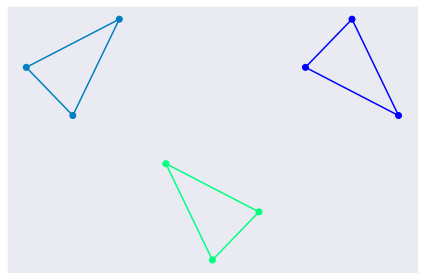

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict
from scipy.spatial import ConvexHull

# This data set represents a toy manufacturer's product data
#
# The first value in the pair represents a toy:
#    0-2: Action Figures
#    3-5: Building Blocks
#    6-8: Cars
#
# The second value is the age group that buys the most of that toy:
#    0: 5 year-olds
#    1: 6 year-olds
#    2: 7 year-olds
#    3: 8 year-olds
#    4: 9 year-olds
#    5: 10 year-olds
x = np.array([[0,4], [1,3], [2,5], [3,2], [4,0], [5,1], [6,4], [7,5], [8,3]])

# Set up hierarchical clustering and stop at 3 clusters
num_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=num_clusters).fit(x)

# Plot the data
sns.set_style("darkgrid")
colors = plt.get_cmap("winter")
points = plt.scatter(x[:, 0], x[:, 1], c=hierarchical.labels_,
            cmap=colors)

# Draw in the cluster regions
regions = defaultdict(list)
# Split points based on cluster
for index, label in enumerate(hierarchical.labels_):
    regions[label].append(list(x[index]))

# If a cluster has more than 2 points, find the convex hull for the region
# Otherwise just draw a connecting line
for key in regions:
    cluster = np.array(regions[key])
    if len(cluster) > 2:
        hull = ConvexHull(cluster)
        vertices = hull.vertices
        vertices = np.append(vertices, hull.vertices[0])
        plt.plot(cluster[vertices, 0], cluster[vertices, 1],
                 color=points.to_rgba(key))
    else:
        np.append(cluster, cluster[0])
        x_region, y_region = zip(*cluster)
        plt.plot(x_region, y_region, color=points.to_rgba(key))

# Remove ticks from the plot
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

### Principal Component Analysis

Principal component analysis is one technique used to take a large list of interconnected variables and choose the ones that best suit a model. This process of focusing in on only a few variables is called dimensionality reduction, and helps reduce complexity of our dataset.

Feature elimination simply involves pruning features from a dataset we deem unnecessary. A downside of feature elimination is that we lose any potential information gained from the dropped features.

Feature extraction, however, creates new variables by combining existing features. At the cost of some simplicity or interpretability, feature extraction allows you to maintain all important information held within features.

Principal component analysis deals with feature extraction (rather than elimination) by creating a set of independent variables called principal components.
Techniques of performing principal component analysis range from arbitrarily selecting principal components, to automatically finding them until a variance is reached.

Plotting our created dataset...

Points:
( 0.3741, -0.0370)
( 0.3207, -0.3301)
(-1.4980, -0.3971)
(-0.1325, -0.0600)
( 1.4778,  0.9578)
( 0.1741,  0.3947)
( 0.2139, -0.0263)
(-0.0543,  0.0977)
(-0.2944,  0.0599)
( 0.0175,  0.0819)
...



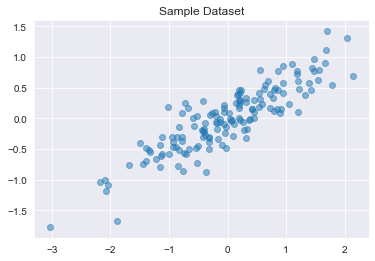

Plotting our calculated principal components...



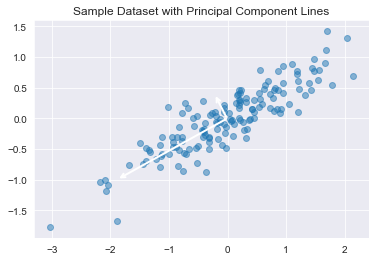

( 0.2771,  0.2771)
( 0.1140,  0.1140)
(-1.3336, -1.3336)
(-0.1280, -0.1280)
( 1.5503,  1.5503)
( 0.2995,  0.2995)
( 0.1564,  0.1564)
(-0.0017, -0.0017)
(-0.2048, -0.2048)
( 0.0478,  0.0478)
Plotting our dataset with a dimensionality reduction...


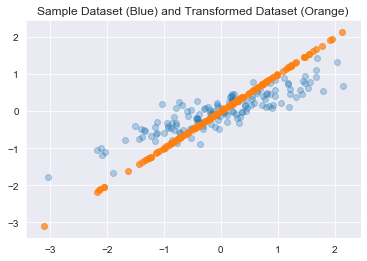

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# A value we picked to always display the same results
# Feel free to change this to any value greater than 0 view different random value outcomes
seed = 9000

# We're using a seeded random state so we always get the same outcome
seeded_state = np.random.RandomState(seed=seed)

# Returns a random 150 points (x, y pairs) in a gaussian distribution,
# IE most of the points fall close to the average with a few outliers
rand_points = seeded_state.randn(150, 2)

# The @ operator performs matrix multiplication, and serves to bring
# our gaussian distribution points closer together
points = rand_points @ seeded_state.rand(2, 2)
x = points[:, 0]
y = points[:, 1]

# Now we have a sample dataset of 150 points to perform PCA on, so
# go ahead and display this in a plot.
plt.scatter(x, y, alpha=0.5)
plt.title("Sample Dataset")

print("Plotting our created dataset...\n")
print("Points:")
for p in points[:10, :]:
    print("({:7.4f}, {:7.4f})".format(p[0], p[1]))
print("...\n")

plt.show()

# Find two principal components from our given dataset
pca = PCA(n_components = 2)
pca.fit(points)

# Once we are fitted, we have access to inner mean_, components_, and explained_variance_ variables
# Use these to add some arrows to our plot
plt.scatter(x, y, alpha=0.5)
plt.title("Sample Dataset with Principal Component Lines")

for var, component in zip(pca.explained_variance_, pca.components_):
    plt.annotate(
        "",
        component * np.sqrt(var) * 2 + pca.mean_,
        pca.mean_,
        arrowprops = {
            "arrowstyle": "->",
            "linewidth": 2
        }
    )

print("Plotting our calculated principal components...\n")

plt.show()

# Reduce the dimensionality of our data using a PCA transformation
pca = PCA(n_components = 1)
transformed_points = pca.fit_transform(points)

# Note that all the inverse transformation does is transforms the data to its original space.
# In practice, this is unnecessary. For this example, all data would be along the x axis.
# We use it here for visualization purposes
inverse = pca.inverse_transform(transformed_points)
t_x = inverse[:, 0]
t_y = inverse[:, 0]

for p in inverse[:10, :]:
    print("({:7.4f}, {:7.4f})".format(p[0], p[0]))

# Plot the original and transformed data sets
plt.scatter(x, y, alpha=0.3)
plt.scatter(t_x, t_y, alpha=0.7)
plt.title("Sample Dataset (Blue) and Transformed Dataset (Orange)")

print("Plotting our dataset with a dimensionality reduction...")

plt.show()